In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/CyberAttackCTI/4th_Objective/LabelEncodingBasedAnalysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

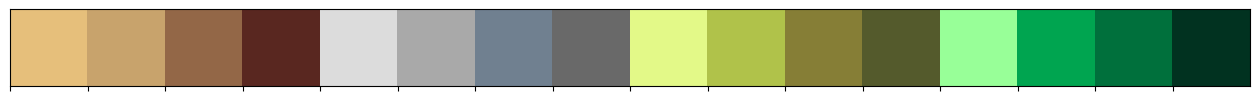

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

colors = [
    "#e6bf7b", "#c8a36c", "#936747", "#592720", "#dcdcdc", "#a9a9a9",
    "#708090", "#696969", "#e3f988", "#b0c24a", "#867e36", "#545a2c",
    "#98ff98", "#00a550", "#00703c", "#013220"
]
sns.palplot(sns.color_palette(colors))

In [3]:
path=os.getcwd()
path

'C:\\Users\\SS-Computer\\CyberAttackCTI\\4th_Objective\\LabelEncodingBasedAnalysis'

In [4]:
df= pd.read_csv(path + '/Label_Encoding_of_Vulnerable_Events.csv')

In [5]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
df.head()

,Scenario,Vulnerable_event_type,Cyber_attack,Label_of_events,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,Scenario_1,Non_attack_vulnerability,Non_attack_vulnerability,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Scenario_2,Non_attack_vulnerability,Non_attack_vulnerability,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Scenario_3,Non_attack_vulnerability,Non_attack_vulnerability,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Scenario_4,Non_attack_vulnerability,Non_attack_vulnerability,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,Scenario_5,Non_attack_vulnerability,Non_attack_vulnerability,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [6]:
df = df.drop('Scenario',axis=1)
df = df.drop('Vulnerable_event_type',axis=1)
df = df.drop('Cyber_attack',axis=1)
df.head()

,Label_of_events,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [7]:
X = df.drop('Label_of_events',axis=1)
y = df['Label_of_events']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=30)

In [8]:
df['Label_of_events'].value_counts()

Label_of_events
1    32
0     9
Name: count, dtype: int64

In [9]:
X_train.head()

,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
21,3,1,0,0,0,0,1,0,0,1,1,0,0,0
19,2,1,0,1,1,1,0,0,6,0,0,2,0,0
32,4,1,0,2,2,2,0,0,0,0,0,0,1,3
36,3,1,0,2,2,2,1,0,0,6,6,0,0,0
4,0,0,0,1,1,1,2,0,0,0,0,0,0,0


In [10]:
X_test.head()

,Cyber_attack_label_encoding,Intrusion,Network_device,Intelligent_electronic_device(IED),Circuit_breaker_of_IED,Power_transmission_line_of_Circuit_breakers,Single-line-to-ground(SLG)_fault_of_power_line,Tripping_command_issue_of_power_line,Command_injection_against_IED_Relay,IED_Relay_disabled_issue,IED_Relay_fault_issue,Open_breaker_issue_by_command_injection,Downtime_issue,Power_line_maintenance_issue
31,4,1,0,2,2,2,0,0,0,0,0,0,1,3
22,3,1,0,0,0,0,1,0,0,2,2,0,0,0
24,3,1,0,0,0,0,1,0,0,2,2,0,0,0
9,1,1,0,1,1,1,2,1,0,0,0,0,0,0
10,1,1,0,1,1,1,2,1,0,0,0,0,0,0


In [11]:
y_train.head()

21    1
19    1
32    1
36    1
4     0
Name: Label_of_events, dtype: int64

In [12]:
y_test.head()

31    1
22    1
24    1
9     1
10    1
Name: Label_of_events, dtype: int64

# Extra Trees ( extremely randomized trees)

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[1 0]
 [0 8]]


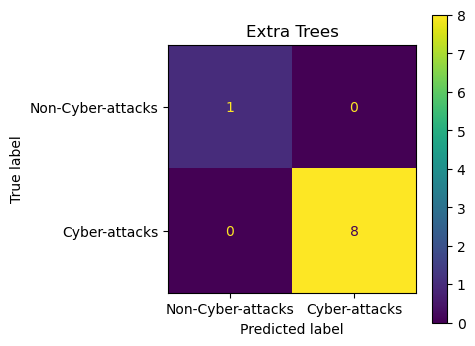

True positive =  8
False negative =  0
False positive =  0
True negative =  1


In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

ExtraTreesClassifier = ExtraTreesClassifier()
ExtraTreesClassifier.fit(X_train, y_train)
y_pred_ExtraTreesClassifier = ExtraTreesClassifier.predict(X_test)
acc_ExtraTreesClassifier = round(accuracy_score(y_test,y_pred_ExtraTreesClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(ExtraTreesClassifier.score(X_train, y_train), pos_label="1"))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_ExtraTreesClassifier), pos_label="1"))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_ExtraTreesClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_ExtraTreesClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_ExtraTreesClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_ExtraTreesClassifier))
#pos_label="Attack"

cm = confusion_matrix(y_test,y_pred_ExtraTreesClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyber-attacks','Cyber-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Extra Trees')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# XGBoost (eXtreme Gradient Boosting)

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[1 0]
 [0 8]]


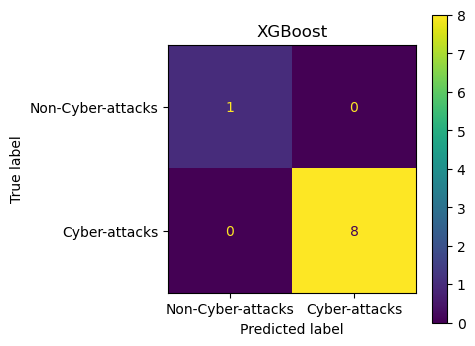

True positive =  8
False negative =  0
False positive =  0
True negative =  1


In [14]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train, y_train)
y_pred_XGBClassifier = XGBClassifier.predict(X_test)
acc_XGBClassifier = round(accuracy_score(y_test,y_pred_XGBClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(XGBClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_XGBClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_XGBClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_XGBClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_XGBClassifier))

cm = confusion_matrix(y_test,y_pred_XGBClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyber-attacks','Cyber-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('XGBoost')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# Random Forest

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[1 0]
 [0 8]]


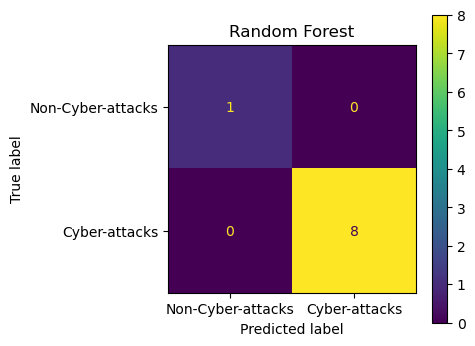

True positive =  8
False negative =  0
False positive =  0
True negative =  1


In [15]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators=100)
RandomForestClassifier.fit(X_train, y_train)
y_pred_RandomForestClassifier = RandomForestClassifier.predict(X_test)
acc_RandomForestClassifier = round(accuracy_score(y_test,y_pred_RandomForestClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(RandomForestClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_RandomForestClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_RandomForestClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_RandomForestClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_RandomForestClassifier))

cm = confusion_matrix(y_test,y_pred_RandomForestClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyber-attacks','Cyber-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Random Forest')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# Bootstrap aggregating (Bagging)

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[1 0]
 [0 8]]


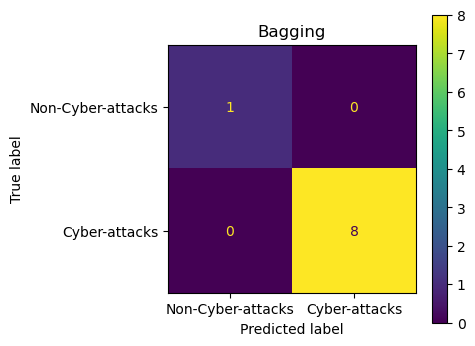

True positive =  8
False negative =  0
False positive =  0
True negative =  1


In [17]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred_BaggingClassifier = BaggingClassifier.predict(X_test)
acc_BaggingClassifier = round(accuracy_score(y_test,y_pred_BaggingClassifier)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(BaggingClassifier.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_BaggingClassifier)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_BaggingClassifier)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_BaggingClassifier),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_BaggingClassifier))

cm = confusion_matrix(y_test,y_pred_BaggingClassifier)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyber-attacks','Cyber-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Bagging')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# Logistic regression

 Train set score: 1.00
 Accuracy Score : 1.00
 Precision Score: 1.00
 Recall Score   : 1.00
 f1 Score       : 1.00 

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         8

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9
 

 Confusion Matrix:
 [[1 0]
 [0 8]]


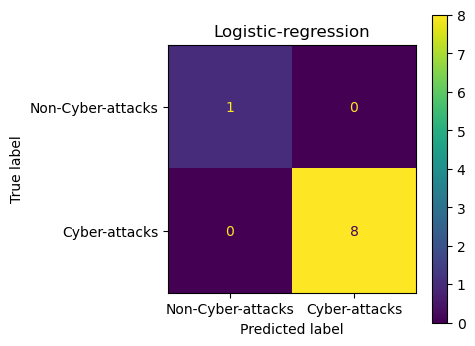

True positive =  8
False negative =  0
False positive =  0
True negative =  1


In [19]:
from sklearn.linear_model import LogisticRegression

LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
y_pred_LogisticRegression = LogisticRegression.predict(X_test)
acc_LogisticRegression = round(accuracy_score(y_test,y_pred_LogisticRegression)*100,2)

print(f"\033[031m\033[1m","Train set score: {:.2f}".format(LogisticRegression.score(X_train, y_train)))
print(f"\033[031m\033[1m","Accuracy Score : {:.2f}".format(accuracy_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Precision Score: {:.2f}".format(precision_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","Recall Score   : {:.2f}".format(recall_score(y_test,y_pred_LogisticRegression)))
print(f"\033[031m\033[1m","f1 Score       : {:.2f}".format(f1_score(y_test,y_pred_LogisticRegression)),'\n')
print(f"\033[032m\033[1m","Classification Report:\n", classification_report(y_test,y_pred_LogisticRegression),'\n')
print(f"\033[034m\033[1m","Confusion Matrix:\n",confusion_matrix(y_test,y_pred_LogisticRegression))

cm = confusion_matrix(y_test,y_pred_LogisticRegression)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Cyber-attacks','Cyber-attacks'])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
plt.title('Logistic-regression')
plt.show()
print('True positive = ', cm[1][1])
print('False negative = ', cm[1][0])
print('False positive = ', cm[0][1])
print('True negative = ', cm[0][0])

# ROC-AUC

In [27]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss

def cross_val(X, y, model, params, folds=9,lw=5):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400,
                eval_metric='mlogloss')

        pred = alg.predict_proba(x_test)
        loss = log_loss(y_test, pred)
        print(f"Log loss: {loss}")
        print("-"*50)
    
    return alg

In [28]:
plt.figure(figsize=(18,12))
sns.set_theme(style="whitegrid")
sns.set_context('paper', font_scale=1.8)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

lr = LogisticRegression()
rf = RandomForestClassifier()
#abc = AdaBoostClassifier()
#gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
xgbc = XGBClassifier()
svm = SVC(probability=True)
dtc = DecisionTreeClassifier()

<Figure size 1800x1200 with 0 Axes>

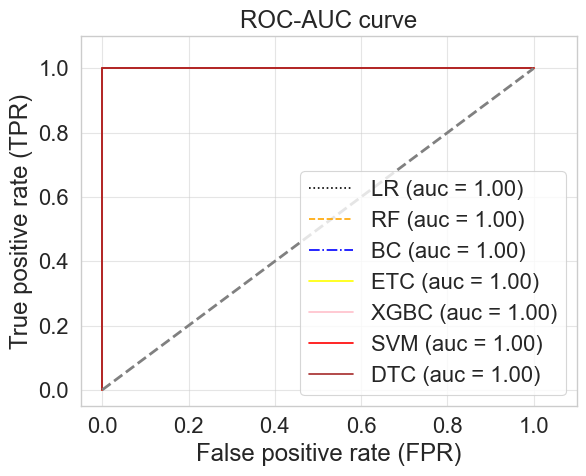

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


all_clf=[lr,rf,bc,etc,xgbc,svm,dtc]
clf_labels=["LR", "RF","BC", "ETC","XGBC","SVM","DTC"]
colors =["black", "orange", "blue", "yellow","pink","red","Brown"]
linestyles = [":","--", "-.","-","-","-","-"]

for clf, label,clr,ls in zip(all_clf, clf_labels, colors, linestyles):
  y_pred= clf.fit(X_train,y_train).predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(y_true= y_test, y_score=y_pred)
  roc_auc= auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls,
           label='%s (auc = %0.2f)' % (label, roc_auc))
  
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],linestyle='--',color='gray',linewidth=2)
plt.xlim([-0.05,1.1])
plt.ylim([-0.05,1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC-AUC curve')
plt.show()